<a href="https://colab.research.google.com/github/kanishk16/Stepping-Up-with-CV/blob/master/Ball_Tracking_(Day_05).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# neccessary imports
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from imutils.video import VideoStream 
# from imutils import contours
# from imutils.perspective import four_point_transform
from collections import deque
import imutils
import time
from google.colab.patches import cv2_imshow as cv_imshow

# version check
cv.__version__

'4.1.2'

> STEPS to BALL TRACKin

* Detect the presence of a ball in the video
* Track the ball as it moves in the video frame (discretization of the path)

NOTE: For more ideas n applns. read the discussions of this [blog](https://www.pyimagesearch.com/2015/09/14/ball-tracking-with-opencv/?__s=pp3fsqvmd1wahefsfr5s)

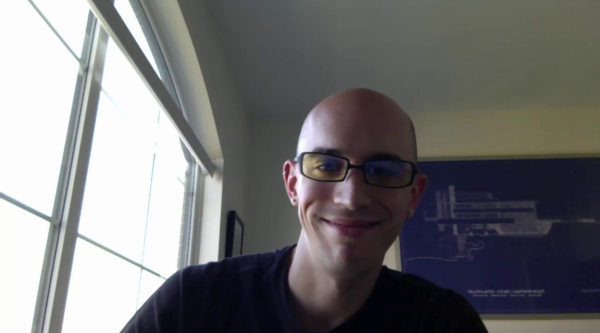

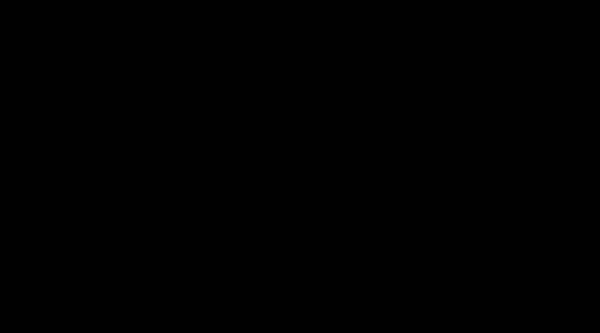

TypeError: ignored

In [11]:
## Detecting the ball in the video frame
# define the green band(lower + upper) -- range-detector module: imutils/bin/range-detector 
low_green = (29, 86, 6)
high_green = (64, 255, 255)

# initializing the list of track pts.
pts = deque(maxlen = 20)

# grabbing ref. to the video file
vs = cv.VideoCapture('/content/ball_tracking_example.mp4')

# loop on..
while True:

  # grab the current frame 
  frame = vs.read()

  # exit if no frame returned
  if not frame:
    break
  else:
    # resize = process the frame faster + inc. in FPS(less img. data to process) 
    freeze = imutils.resize(frame[1], width=600)
    
    # blur = reduce high freq. noise + focus strucutral obj. inside the fame
    blur_fr = cv.GaussianBlur(freeze, (11,11), 0)
    
    # conversion to HSV = identification specifications
    hsv_fr = cv.cvtColor(blur_fr, cv.COLOR_BGR2HSV)

    # construct a mask + localization of the GREEN ball
    mask = cv.inRange(hsv_fr, low_green, high_green) 
    mask_fr = cv.dilate(mask, None, iterations=2)    
    mask_fr = cv.erode(mask, None, iterations=2)

    cv_imshow(freeze)
    cv_imshow(mask_fr)

    # find the contours of the ball from the mask frame
    contours = cv.findContours(mask_fr.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # initialize the center
    center = None

    # apply only if any contour is found
    if len(contours):

      # find the largest contour in the mask
      cntrs = max(contours, key=cv.contourArea)

      # compute the min. enclosing circle 
      ((x,y), r) = cv.minEnclosingCircle(cntrs)

      # compute the centroid 
      k = cv.moments(cntrs)
      center = (int(k["m10"] / k["m00"]), int(k["m01"] / k["m00"]))

      # proceed only if radius meets the specific size
      if r>10:
        # draw the circle on the frame
        cv.circle(frame, (int(x),int(y)), r, (0,255,255), 2)
        # draw the centroid on the frame
        cv.circle(frame, center, 5, (0,0,255), -1)

      # update the pts[] with the center of the ball in this particular frame
      pts.appendleft(center)

      # draw the contrail of the ball
      for i in range(1, len(pts)):

        # ignore the pts if None
        if pts[i-1] is None or pts[i] is None:
          continue

        # compute the thickness of the line + draw the connecting lines
        thickness = int(np.sqrt(20/float(i+1)*2.5))
        cv.line(frame, pts[i-1], pts[i], (0,0,255), thickness)

      cv_imshow(frame)

      key = cv.waitKey(1) & 0xFF

    # STOP as soon as the 'q' key is pressed
    if key == ord("q"):
      break

> Applications 

* Trace multiple objects simulatanously of SAME colour (headlights)+ speed (Sports)
    * Creating a different mask for diff. colors  
* Tracking a squash ball (Challenges)-
    * black ball
    * diameter of ball being small + percieved diameter of the ball even smaller
    * speed of the ball

* Dispatching actions based on the ball reaching the bounding box in the frame(top-left) 
* Tracking the [tracking direction](https://www.pyimagesearch.com/2015/09/21/opencv-track-object-movement/)(left to right, south...)
